# Audioanalyzer

In [1]:
from adaptivetuning import Audioanalyzer
import matplotlib.pyplot as plt
import time

<IPython.core.display.Javascript object>

An Audioanalyzer object reads from a .wav file or records some audio, analyzes it for prominent frequencies and hands them to a given callback function.

For now, we will just store the frequencies in a list to plot them later.

In [2]:
times = []
freqs = []
amps = []
def callback(peaks_freq, peaks_amp):
    times.append(time.time())
    freqs.append(peaks_freq)
    amps.append(peaks_amp)

We can stop the Audioanalyzer by setting a threading.Event we pass to the Audioanalyzer when calling analyze_file or analyze_record, but when working in a single thread, it is easier to give a maximal duration after which the analyzer stops automatically.

In [3]:
audioanalyzer = Audioanalyzer(silent=False, result_callback=callback, max_nr_peaks=5)
audioanalyzer.analyze_file("audio_files/example_noise_1.wav", max_duration=10)

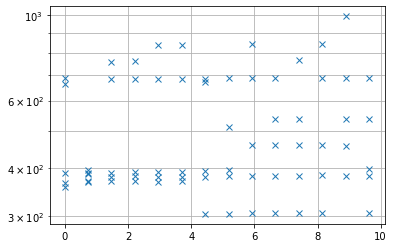

In [4]:
data = [(times[i] - times[0], f) for i in range(len(times)) for f in freqs[i]]
x, y = zip(*data)
plt.semilogy(x, y, 'x')
plt.grid(True, 'both')

This is how you analyze a live recording:

In [17]:
times = []
freqs = []
amps = []

In [18]:
audioanalyzer.analyze_record(max_duration=10)

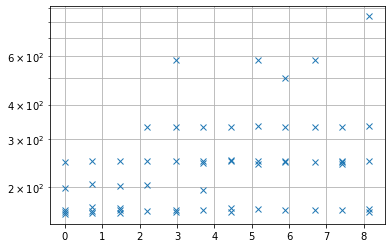

In [19]:
data = [(times[i] - times[0], f) for i in range(len(times)) for f in freqs[i]]
x, y = zip(*data)
plt.semilogy(x, y, 'x')
plt.grid(True, 'both')

Note that this is only storing prominent frequencies - If there is nothing in your plot, it might just be because there are no prominent frequencies in your environment, or they are not loud enough for your microphone to pick them up.

Let's use the sound of a humming guitar amp as a timbre for a synth, just for fun!

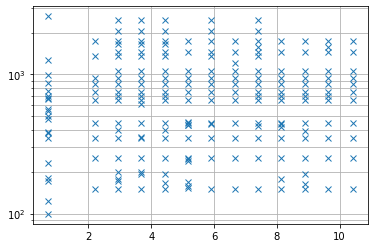

In [48]:
times = []
freqs = []
amps = []
audioanalyzer.max_nr_peaks = 20
audioanalyzer.analyze_file("audio_files/example_noise_2.wav", max_duration=10)
data = [(times[i] - times[0], f) for i in range(len(times)) for f in freqs[i]]
x, y = zip(*data)
plt.semilogy(x, y, 'x')
plt.grid(True, 'both')

<BarContainer object of 18 artists>

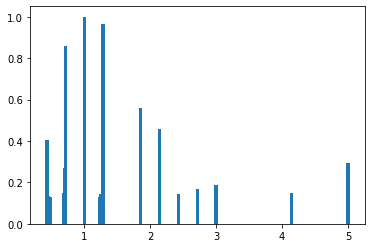

In [39]:
partials_amp = amps[7] / amps[7][0]
partials_pos = [f / freqs[7][0] for f in freqs[7]]
plt.bar(partials_pos, partials_amp, width=0.05)

In [40]:
import sc3nb
sc = sc3nb.startup()
#sc = None

Starting sclang...
Done.
Starting osc communication...
This sc3nb sc instance is at port: 57130
Done.
Registering UDP callback...
Done.
Booting server...
Done.
-> sc3nb started


In [41]:
from adaptivetuning import Audiogenerator
a = Audiogenerator(sc = sc)

In [42]:
a.partials_amp = partials_amp
a.partials_pos = partials_pos

In [65]:
a.note_on(65, 1)

In [66]:
a.note_off(65)

In [67]:
from adaptivetuning import Midiprocessing
m = Midiprocessing()
m.register_audiogenerator(a)
m.max_notes = 30

In [68]:
m.get_port_names()

['MPK mini']

In [69]:
m.port_name = 'MPK mini'

In [70]:
m.play_port()